In [83]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [84]:
model = tf.keras.models.load_model('save_model/x-ray-94acc.h5')
model.summary()

Model: "x_rays_CNN_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 16)      416       
                                                                 
 activation_14 (Activation)  (None, 220, 220, 16)      0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 32)      12832     
                                                                 
 activation_15 (Activation)  (None, 106, 106, 32)      0         
                                                      

In [85]:
conv2d_layers = []
for layer in model.layers[1:-2] :
    if 'conv2d' in layer.name :
        conv2d_layers.append(layer)

In [86]:
conv2d_layers

In [87]:
conv2d_layers[0].get_weights()[0].shape # filters layers

(5, 5, 1, 16)

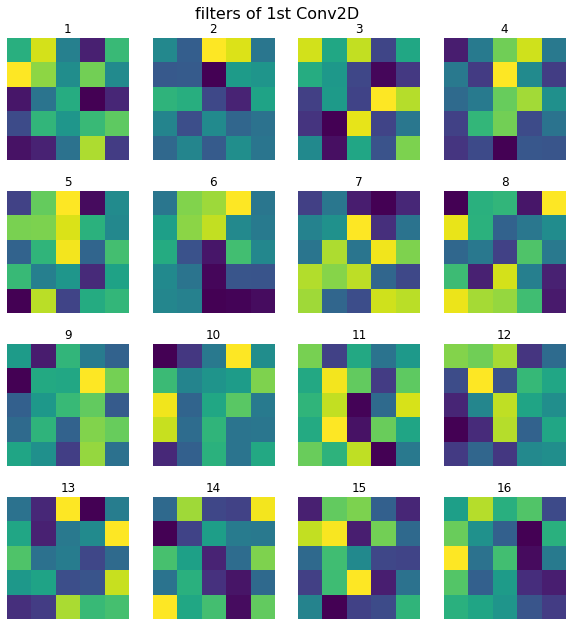

In [88]:
weights, biases = conv2d_layers[0].get_weights()
plt.figure(figsize=(10,10))
for filter in range(weights.shape[-1]) :
    plt.subplot(4,4,filter+1)
    plt.imshow(weights[:,:,:,filter])
    plt.title(filter+1)
    plt.axis('off')
plt.suptitle('filters of 1st Conv2D', fontsize=16)
plt.subplots_adjust(top=0.94);

In [105]:
visualize_layers = model.layers[:4]
visualize_layers # to 1st maxpooling layer

In [106]:
visualize_model = tf.keras.Sequential(visualize_layers)
visualize_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 220, 220, 16)      416       
                                                                 
 activation_14 (Activation)  (None, 220, 220, 16)      0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 16)     0         
 g2D)                                                            
                                                                 
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


In [107]:
from predicts import creat_dataset_batch

visualize_image = creat_dataset_batch(['predicts_custom/IM-0001-0001.jpeg'], batch_size=1)
yhat = visualize_model.predict(visualize_image)
yhat.shape

(1, 110, 110, 16)

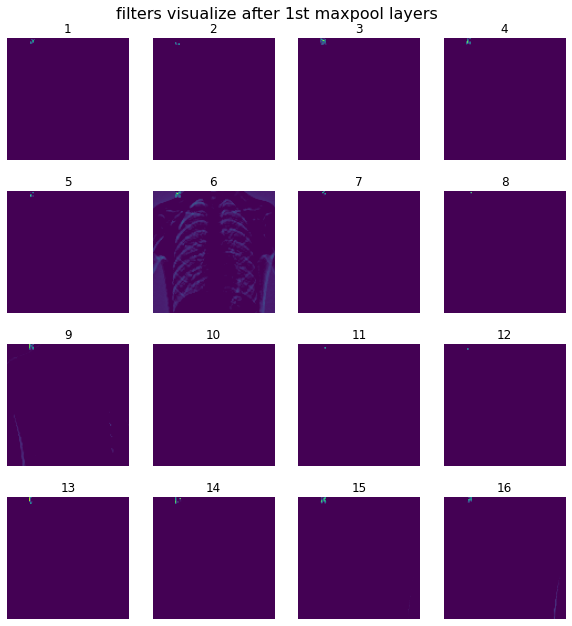

In [109]:
yhat = yhat.reshape(110,110,16) # get the batch out
plt.figure(figsize=(10,10))
for filter_ in range(yhat.shape[-1]) :
    plt.subplot(4,4,filter_+1)
    plt.imshow(yhat[:,:,filter_])
    plt.title(filter_+1)
    plt.axis('off')
plt.suptitle('filters visualize after 1st maxpool layers', fontsize=16)
plt.subplots_adjust(top=0.94);

> you can see the 6th filers can detect the Ribs

In [115]:
visualize_layers = model.layers[:7] # to 2nd maxpooling layer
visualize_model = tf.keras.Sequential(visualize_layers)
yhat = visualize_model.predict(visualize_image)
yhat.shape

(1, 53, 53, 32)

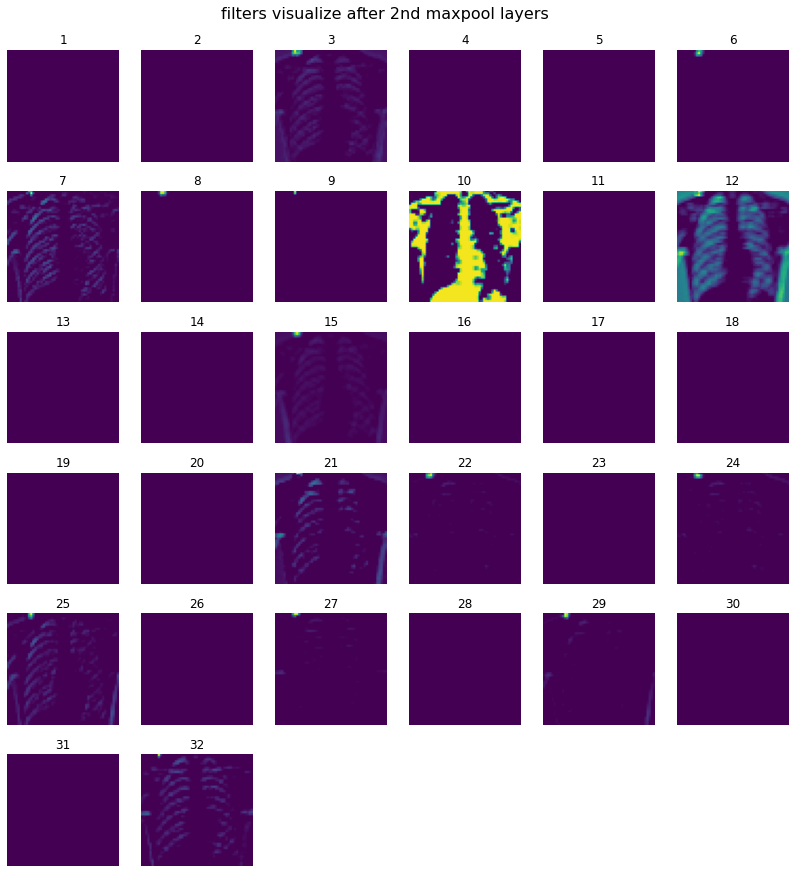

In [119]:
yhat = yhat.reshape(53,53,32) # get the batch out
plt.figure(figsize=(14,14))
for filter_ in range(yhat.shape[-1]) :
    plt.subplot(6,6,filter_+1)
    plt.imshow(yhat[:,:,filter_])
    plt.title(filter_+1)
    plt.axis('off')
plt.suptitle('filters visualize after 2nd maxpool layers', fontsize=16)
plt.subplots_adjust(top=0.94);

> some filters can detected and the 10th can do it clearly.